In [ ]:
import mglearn
import matplotlib.pyplot as plt

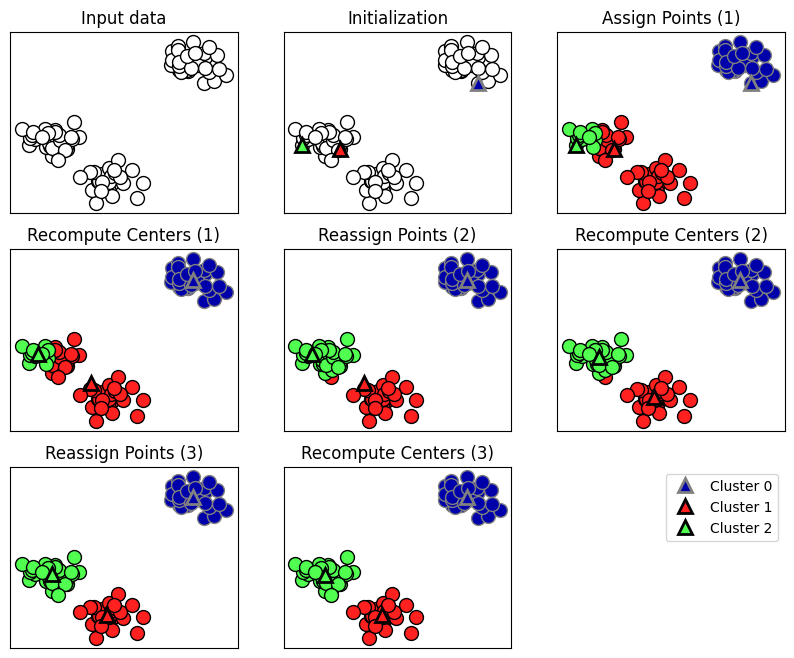

In [ ]:
mglearn.plots.plot_kmeans_algorithm()
# 산점도를 봤을 때, 데이터 군집의 간격조정이 가능하다면, K-min 쓰면 됨.

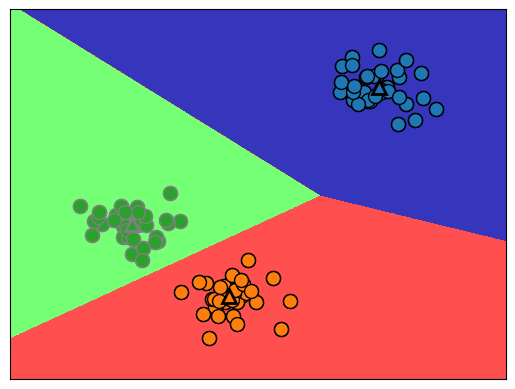

In [ ]:
mglearn.plots.plot_kmeans_boundaries()
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 비지도 학습인데, 왜 y를 넣지요?
# 전처리가 재대로 됐는지 확인하기 위해, 답안지(y)를 만들어 놓음
X, y = make_blobs(random_state=1)


kMeans = KMeans(n_clusters=3)
kMeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
kMeans.labels_

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

In [ ]:
kMeans.predict(X)

# K-min이 잘됐다고 가정하면, DBSCAN에서 밀도가 높은 데이터가 나와야 함.
# DBSCAN 밀도가 높은 데이터가 안 나오고 노이즈가 많다면, K-min이 사기친 것임.

# DBSCAN에서 노이즈가 왜 많아? => 데이터 밀도가 낮고 동그랗지 않기 때문이다.
# 즉 K-min은 이상치를 고려하지 않기 때문에, K-min에서는 잘됐으나 DBSCAN에서는 안된 것임
# 어떻게 해야해? 이상치를 받아드려야 한다.


# 가설은 맞추는 경우가 드물기 때문에 합리성만 가지면 됨. 

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

In [21]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF, PCA
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt
plt.rc('font', family='D2Coding')



In [22]:
# ------------------------------------------------------------- #
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
# ----- 여기까지가 답안용 전처리 / 타깃이 같은 것만 살리겠다. ------ #


X_people = people.data[mask]
X_people = people.target[mask]
X_people = X_people / 255. # 이미지 그레이 스케일로 변환

# 이미지를 처리할 때 회색으로 바꿔서 하는 것 외워놓아라.
# 나중에는 파일토치 vision 같은 것을 씀. 이렇게 구질구질 하게 안씀.

In [23]:
# 지도학습과 동일하게 나눔
X_train, X_test, y_train, y_test = train_test_split(people.data, people.target)

In [24]:
# 원래 데이터를 특성에 따라 나누는 것
nmf = NMF(n_components=100, init='nndsvd', max_iter=1000, tol=1e-2, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

# 클러스터, 데이터를 100개로 분류해서 나누는 것.
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)


KMeans(n_clusters=100, random_state=0)

In [25]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

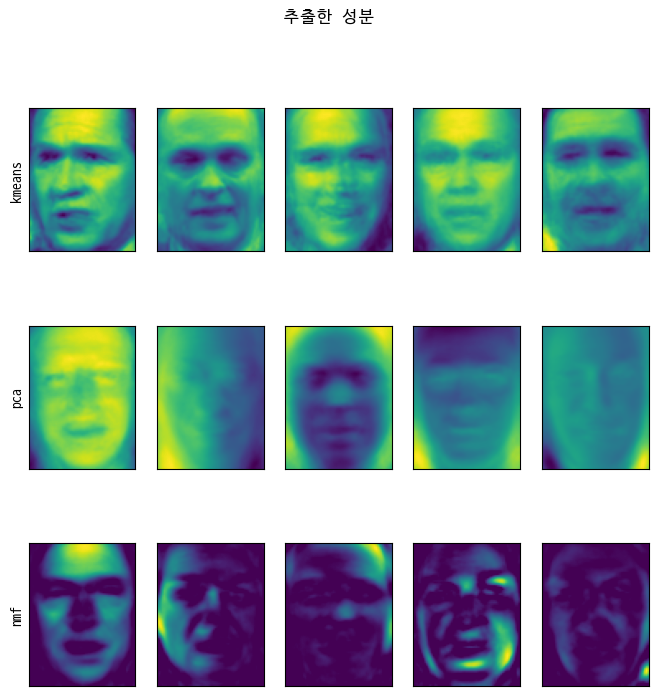

In [26]:
# zip(), enumerate() 함수 알아 놓기!

fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks':(), 'yticks': ()})
fig.suptitle("추출한 성분")
image_shape = people.images[0].shape
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")
plt.show()

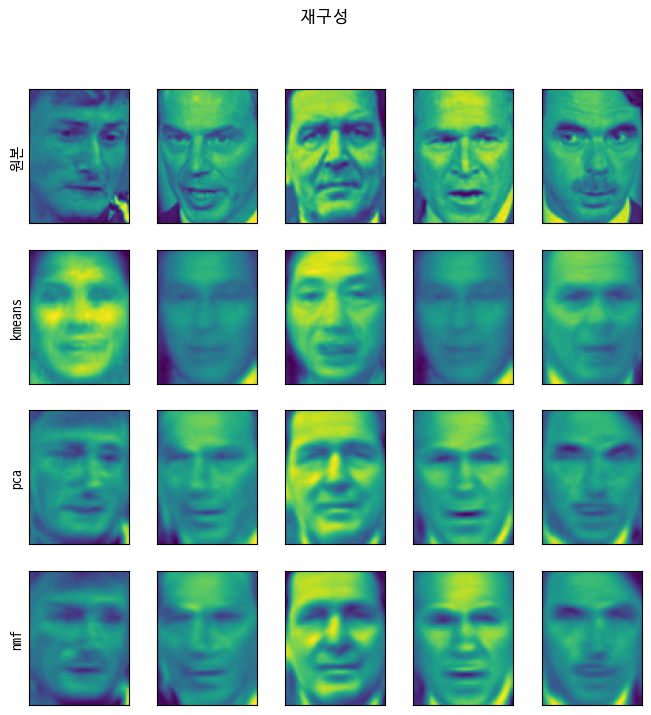

In [27]:
fig, axes = plt.subplots(4, 5, figsize=(8, 8), subplot_kw={'xticks':(), 'yticks': ()})
fig.suptitle("재구성")

for ax, orig, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(comp_kmeans.reshape(image_shape))
    ax[2].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[3].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
plt.show()

In [ ]:
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)

print("클러스터별 포인트 수:", np.bincount(labels +1))
